In [9]:
from fn_cfg import *
import params as cfg

In [10]:
"Laurel Place Dataset"
localPath = '/Users/joshuaighalo/Downloads/brainNet_datasets/laurel_place/cleaned_dataset'
img_save_path = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/laurel place/images/single_averages/1.0'
filename = '0006_2_05122019_1410'
version = 1.0
image_name = "Dementia Scan"

In [11]:
"Bruyere Dataset"
#version = 1.1
#filename = '1_1_04092018_1142'
#localPath = '/Users/joshuaighalo/Downloads/brainNet_datasets/bruyere'

'Bruyere Dataset'

In [12]:
"create a folder to store images produced"
shutil.rmtree(img_save_path, ignore_errors=True)
os.makedirs(img_save_path)

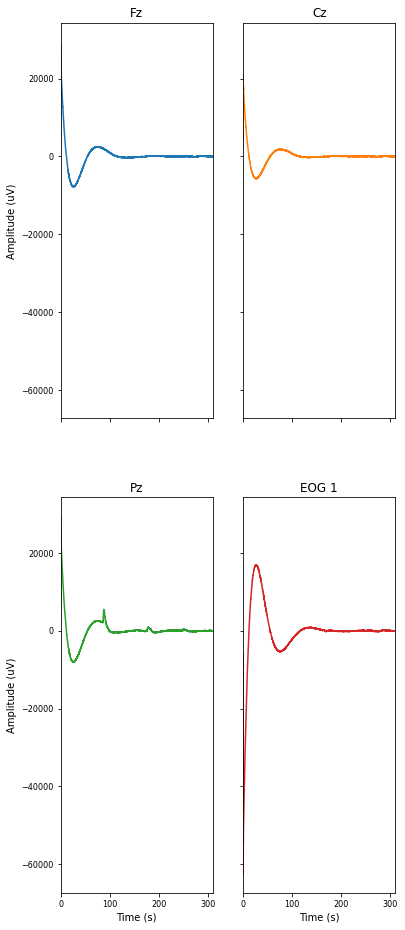

In [13]:
device = importFile.neurocatch()
fileObjects = device.init(version,filename,localPath,dispIMG=False)
rawEEG = fileObjects[0]
rawEOG = fileObjects[1]
rawEEGEOG = fileObjects[2]
time = fileObjects[3]
trigOutput = fileObjects[4]

plots(time,rawEEGEOG,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

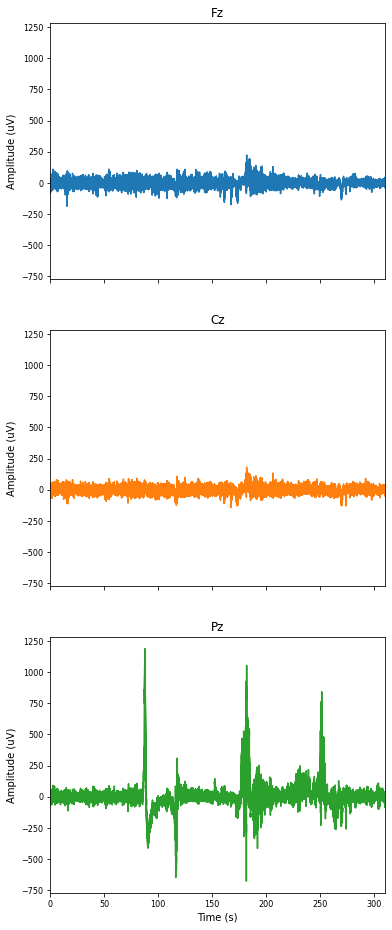

In [14]:
filtering = filters()
adaptiveFilterOutput = filtering.adaptive(rawEEG,rawEOG)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

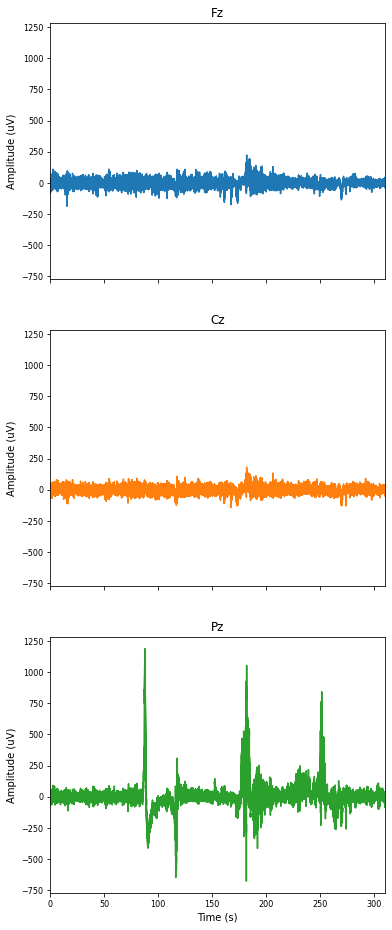

In [15]:
notchFilterOutput = filtering.notch(adaptiveFilterOutput,line,fs)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

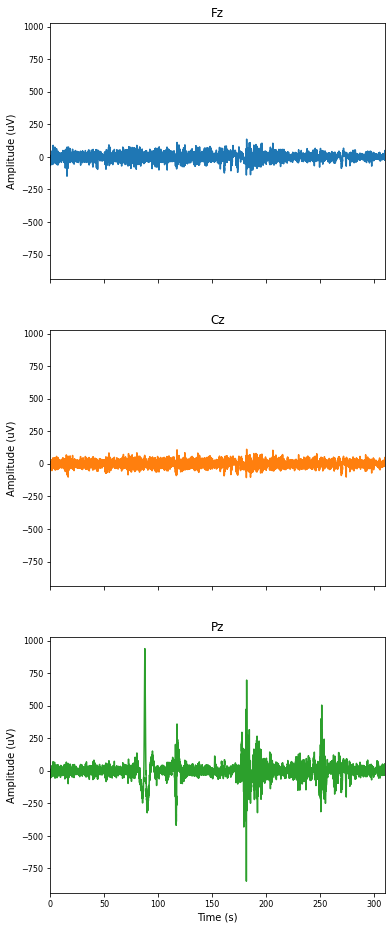

In [16]:
bandPassFilterOutput = filtering.butterBandPass(adaptiveFilterOutput,lowcut=cfg.highPass,highcut=cfg.lowPass,fs=cfg.fs)
plots(time,bandPassFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

In [17]:
erps = erpExtraction()
N1P3 = erps.N100P300(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=False)
N4 = erps.N400(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip,dispIMG=False)
N1P3_Fz = N1P3[0]
N1P3_Cz = N1P3[1]
N1P3_Pz = N1P3[2]
N4_Fz = N4[0]
N4_Cz = N4[1]
N4_Pz = N4[2]
erp_latency = np.array(np.linspace(start=-100, stop=900, num=len(N1P3_Fz[0]),dtype=object),dtype=object)

TypeError: N100P300() missing 2 required positional arguments: 'eegData' and 'period'

In [ ]:
plot_ERPs(img_save_path,N1P3_Fz[0],N1P3_Fz[1],erp_latency,'N1P3_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,N1P3_Cz[0],N1P3_Cz[1],erp_latency,'N1P3_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,N1P3_Pz[0],N1P3_Pz[1],erp_latency,'N1P3_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,N4_Fz[0],N4_Fz[1],erp_latency,'N4_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,N4_Cz[0],N4_Cz[1],erp_latency,'N4_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)
plot_ERPs(img_save_path,N4_Pz[0],N4_Pz[1],erp_latency,'N4_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10,image_name)